In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/top-100-us-cities-by-population/top100cities (3).csv
/kaggle/input/gun-violence-incidents-in-the-usa/all_incidents.csv
/kaggle/input/gun-violence-incidents-in-the-usa/mass_shootings.csv
/kaggle/input/us-2021-census-cities-populations-coordinates/us2021census.csv
/kaggle/input/2019-census-us-population-data-by-state/2019_Census_US_Population_Data_By_State_Lat_Long.csv
/kaggle/input/us-holiday-dates-2004-2021/US Holiday Dates (2004-2021).csv


# Read Data

In [2]:
Gun=pd.read_csv("/kaggle/input/gun-violence-incidents-in-the-usa/all_incidents.csv")
Population=pd.read_csv("../input/2019-census-us-population-data-by-state/2019_Census_US_Population_Data_By_State_Lat_Long.csv")
Population_City=pd.read_csv("../input/top-100-us-cities-by-population/top100cities (3).csv")
Holiday=pd.read_csv("../input/us-holiday-dates-2004-2021/US Holiday Dates (2004-2021).csv")

# Exploratory Data Analysis

The Number Of Gun Incident Per State and Cities

In [3]:
#Gun incidents by State
State_info1 = Gun.state.value_counts().rename_axis('State').reset_index(name='NumberofIncident').sort_values(by=["NumberofIncident"],ascending=True)
State_info1.to_csv('State_info1.csv',index=False)


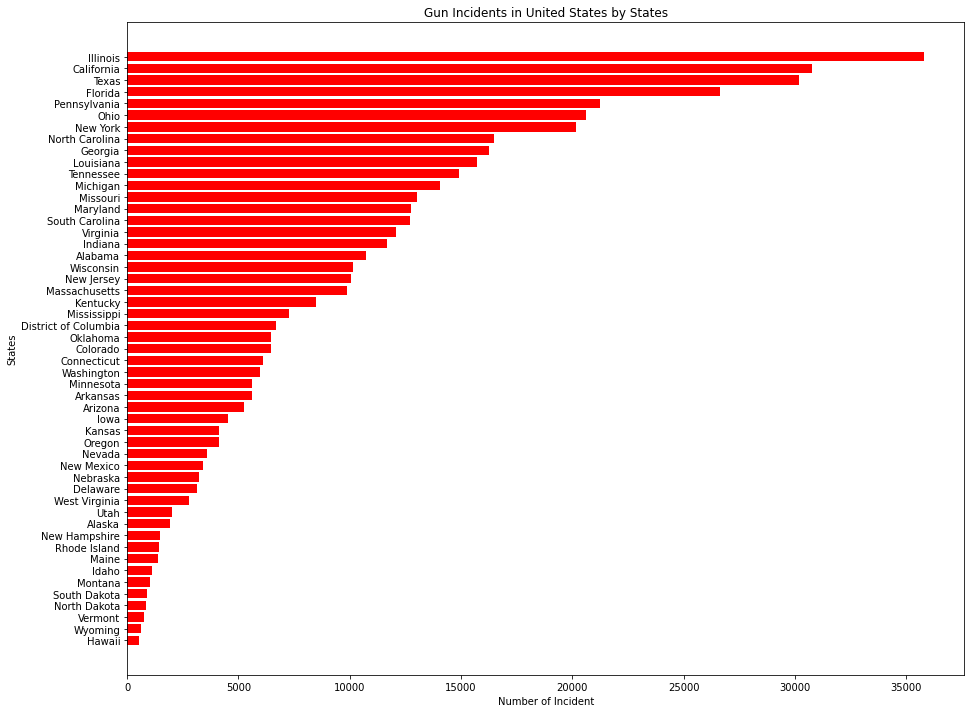

In [4]:
fig = plt.figure(figsize=(15,12))
plt.barh(State_info1.State,State_info1.NumberofIncident,color="red")
plt.ylabel("States")
plt.xlabel("Number of Incident")
plt.title("Gun Incidents in United States by States")
plt.show()

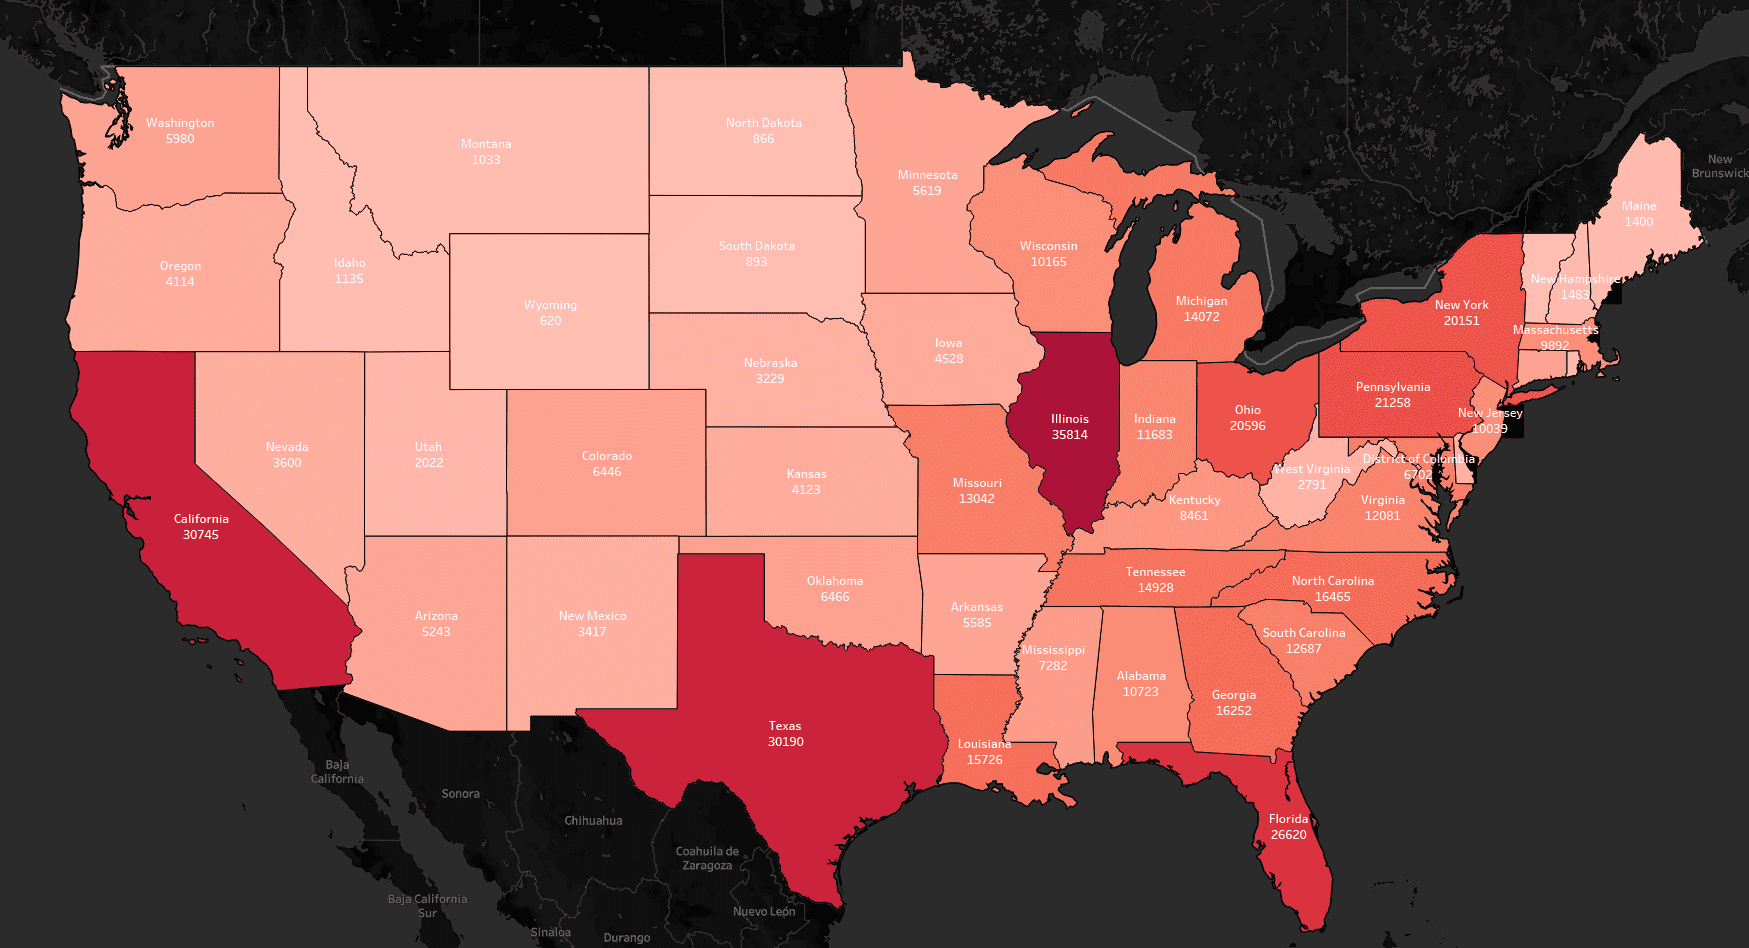

In [5]:
#Gun incidents by cities
City_info1 = Gun.city.value_counts().rename_axis('city').reset_index(name='NumberofIncident').sort_values(by=["NumberofIncident"],ascending=True)
City_info1.to_csv('City_info1.csv',index=False)
City_info1=City_info1.tail(50)


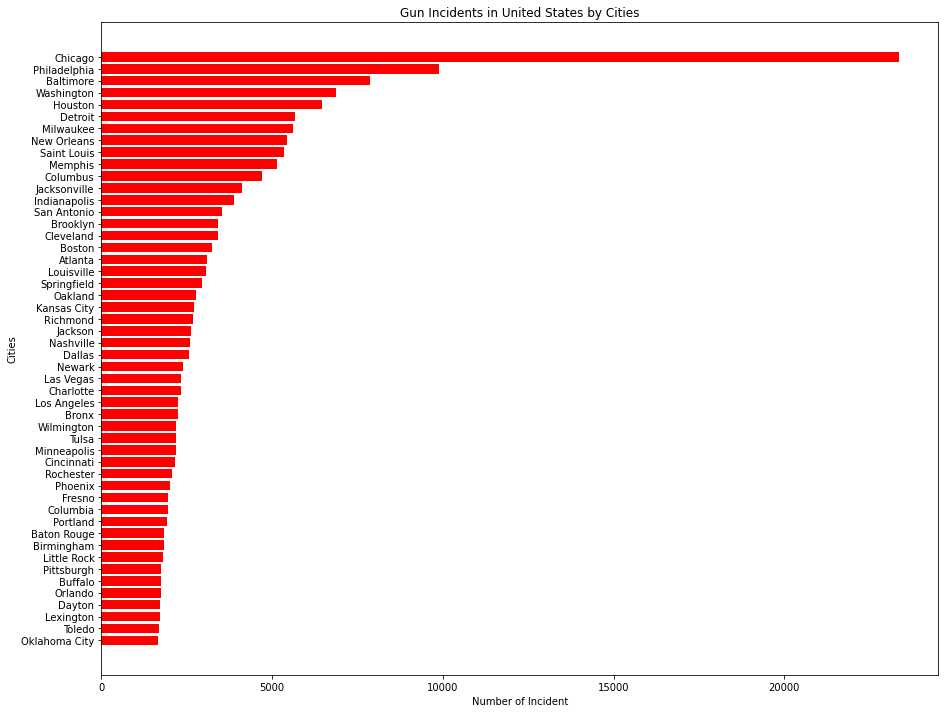

In [6]:
fig = plt.figure(figsize=(15,12))
plt.barh(City_info1.city,City_info1.NumberofIncident,color="red")
plt.ylabel("Cities")
plt.xlabel("Number of Incident")
plt.title("Gun Incidents in United States by Cities")
plt.show()

*Red dots are cities have more than 3000 incidents (Only show cities have more than 10 incidents)*

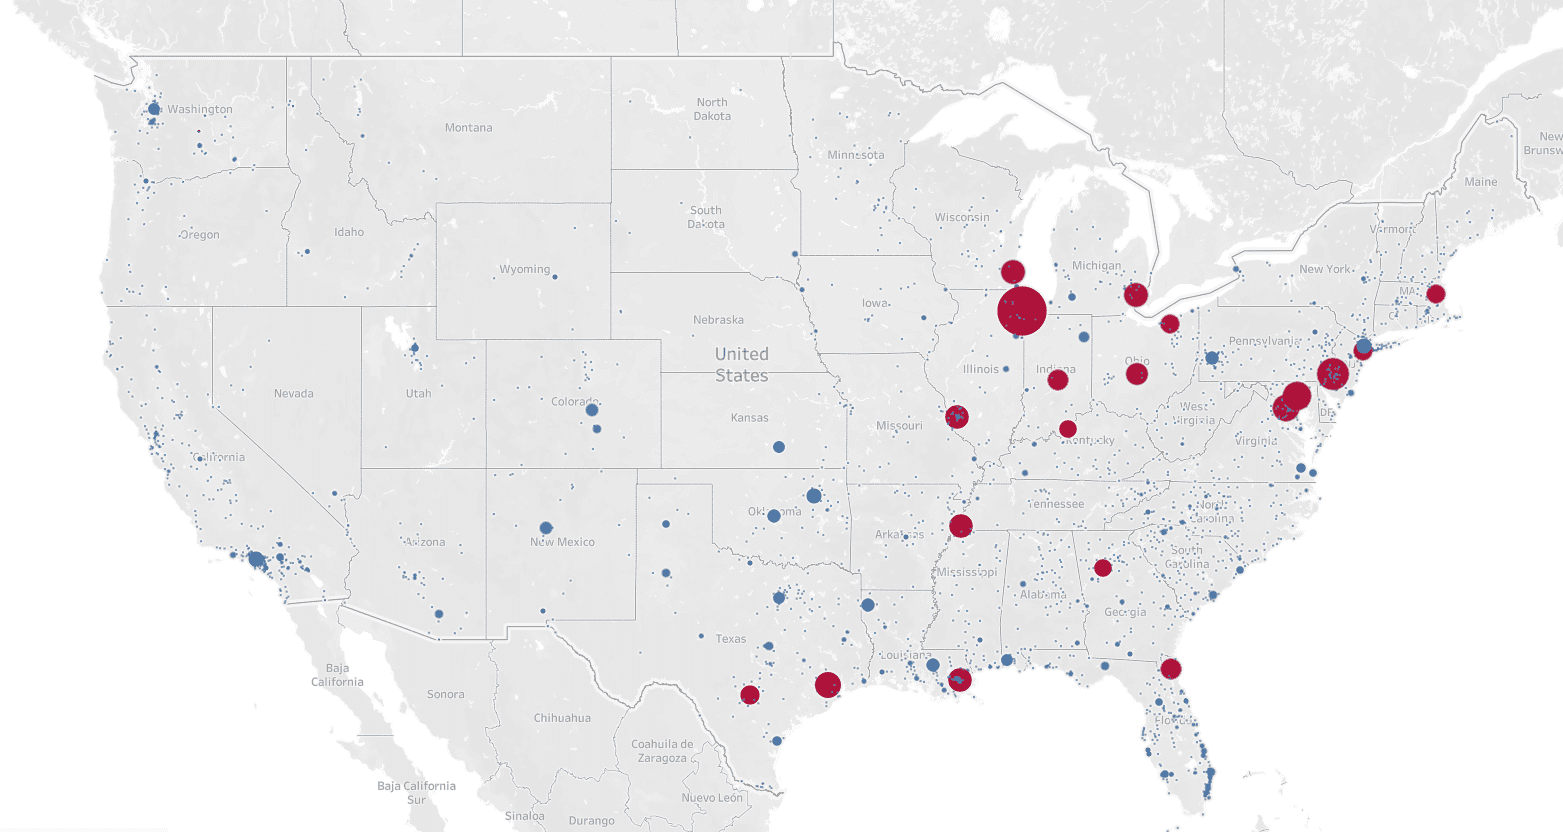

in terms of the number of accidents by states: Illinois, California, Texas have the most incidents

However, the total number of accidents can't reveal the possibility of getting involved in gun accident. The data of incidents relative to the State population size is required

In [7]:
#The Number Of Gun Incident Per 10000 Inhabitant Per Year By State
State_Gun=State_info1.merge(Population,left_on="State",right_on="STATE",suffixes=('_left', '_right'))
State_Gun["IncidentPerInhabitant"]=State_Gun.NumberofIncident/State_Gun.POPESTIMATE2019*10000/8
State_Gun=State_Gun.sort_values(by=["IncidentPerInhabitant"],ascending=True)

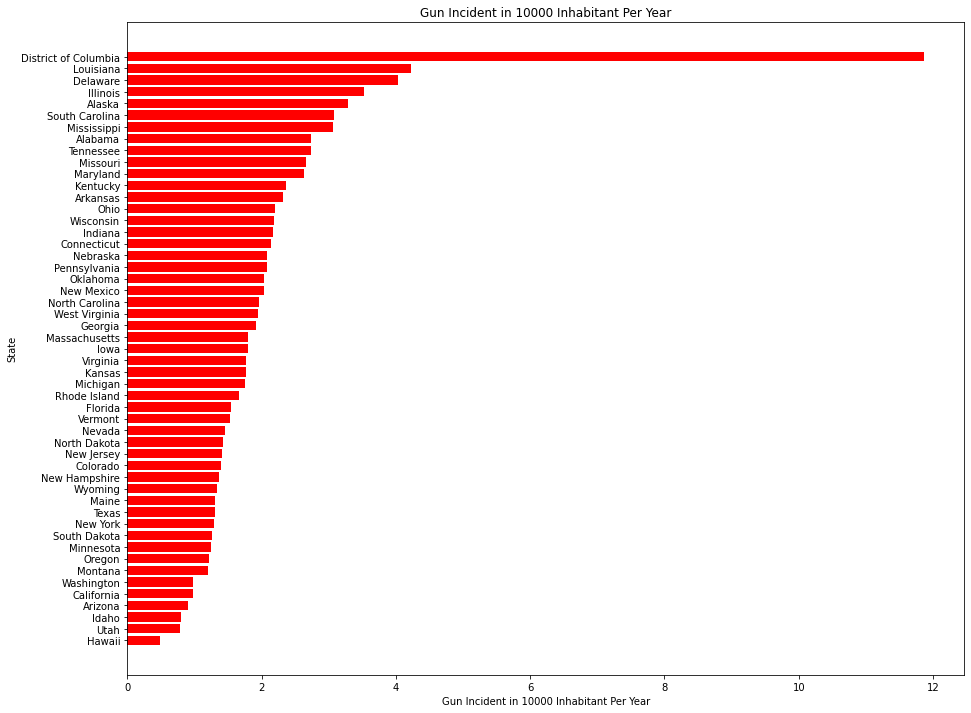

In [8]:
fig = plt.figure(figsize=(15,12))
plt.barh(State_Gun.State,State_Gun.IncidentPerInhabitant,color="red")
plt.ylabel("State")
plt.xlabel("Gun Incident in 10000 Inhabitant Per Year")
plt.title("Gun Incident in 10000 Inhabitant Per Year")
plt.show()

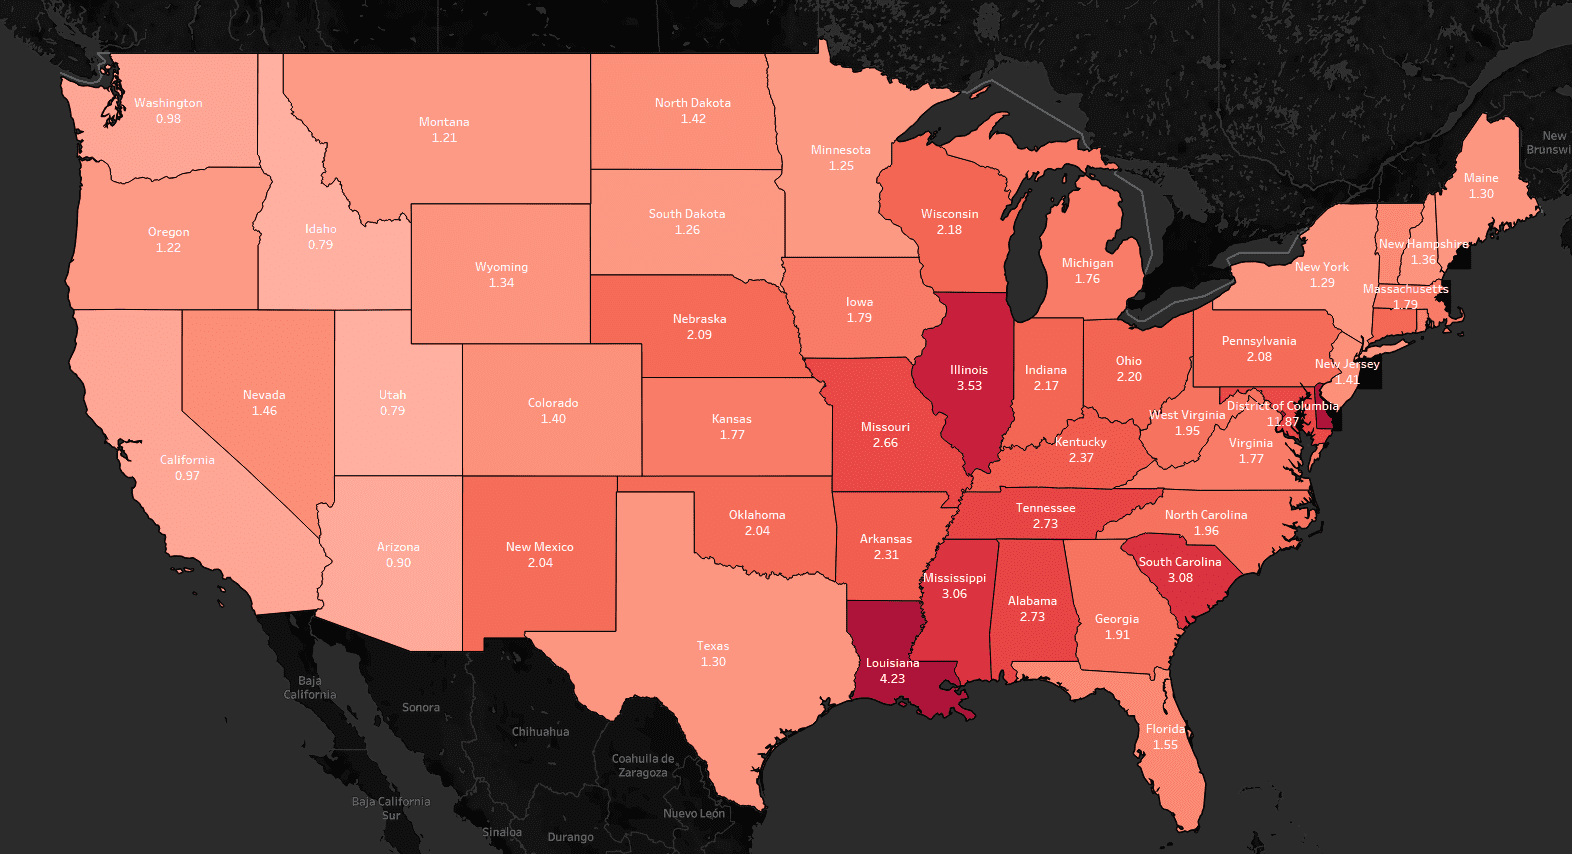

In [9]:
#The Number Of Gun Incident Per 10000 Inhabitant Per Year By City
City_info1=City_info1.head(50).sort_values(by=["NumberofIncident"],ascending=False)
City_info1.at[8,"city"]='St. Louis'

In [10]:
Population_City
City_Gun=City_info1.merge(Population_City,left_on="city",right_on="city",suffixes=('_left', '_right'))
City_Gun["IncidentPerInhabitant"]=City_Gun.NumberofIncident/City_Gun.population_2020*10000/8
City_Gun=City_Gun.sort_values(by=["IncidentPerInhabitant"],ascending=True)

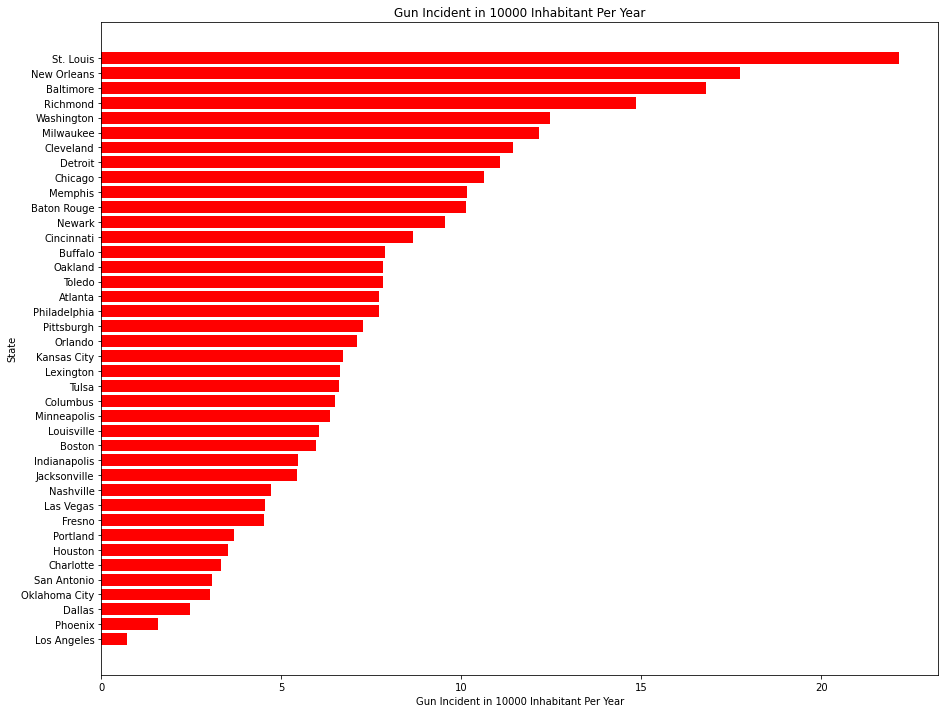

In [11]:
fig = plt.figure(figsize=(15,12))
plt.barh(City_Gun.city,City_Gun.IncidentPerInhabitant,color="red")
plt.ylabel("State")
plt.xlabel("Gun Incident in 10000 Inhabitant Per Year")
plt.title("Gun Incident in 10000 Inhabitant Per Year")
plt.show()

*St. Louis is the "Vice City" in the United States, unfortunately this is where I am right now*

In [12]:
Gun['date'] = pd.DatetimeIndex(Gun['date'])
Gun['year'] = Gun.date.dt.year
GunYear=Gun.year.value_counts().rename_axis('Year').reset_index(name='NumberofIncident').sort_values(by=["Year"],ascending=True).drop([8, 9])


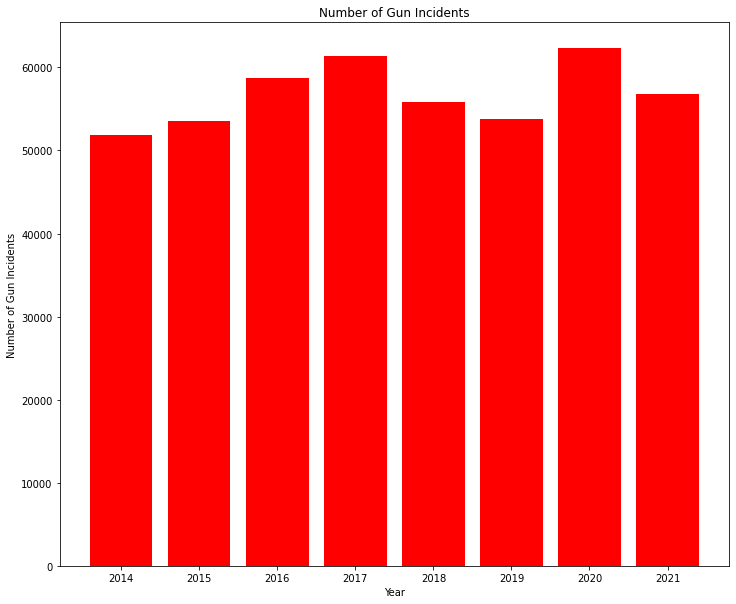

In [13]:
#The Number Of Gun Incident From 2014 to 2021
fig = plt.figure(figsize=(12,10))
plt.bar(GunYear.Year,GunYear.NumberofIncident,color="red")
plt.ylabel("Number of Gun Incidents")
plt.xlabel("Year")
plt.title("Number of Gun Incidents")
plt.show()

In [14]:
#Gun incidents in holidays
Holiday["date"] = pd.DatetimeIndex(Holiday['Date'])
Holiday_Gun=Gun.merge(Holiday,left_on="date",right_on="date",suffixes=('_left', '_right'))
Holiday_Gun1=Holiday_Gun.Holiday.value_counts().rename_axis('Holiday').reset_index(name='NumberofIncident').sort_values(by=["NumberofIncident"],ascending=True)

In [15]:
Holiday_Gun1

,Holiday,NumberofIncident
17,Thanksgiving Day,1038
16,Christmas Day,1041
15,Washington's Birthday,1042
14,Valentine’s Day,1044
13,Thanksgiving Eve,1081
12,Christmas Eve,1108
11,Veterans Day,1152
10,"Martin Luther King, Jr. Day",1195
9,Columbus Day,1212
8,New Year’s Eve,1351


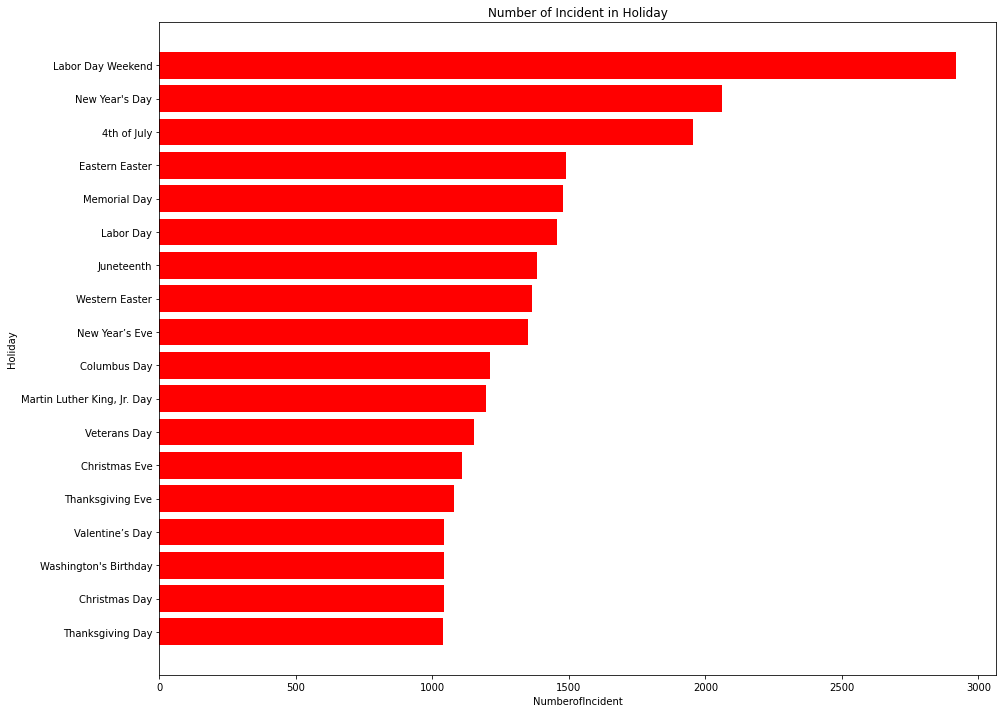

In [16]:
fig = plt.figure(figsize=(15,12))
plt.barh(Holiday_Gun1.Holiday,Holiday_Gun1.NumberofIncident,color="red")
plt.ylabel("Holiday")
plt.xlabel("NumberofIncident")
plt.title("Number of Incident in Holiday")
plt.show()

*Why there are so many gun incidents in the Labor Day Weekend? Any thought?*

In [17]:
#Number of Incident group by day of week
Gun["DateofWeek"]= pd.to_datetime(Gun.date, format ="%Y-%m-%d").dt.day_name()
GunDateofWeek=Gun.DateofWeek.value_counts().rename_axis('DateofWeek').reset_index(name='NumberofIncident').sort_values(by=["NumberofIncident"],ascending=False)

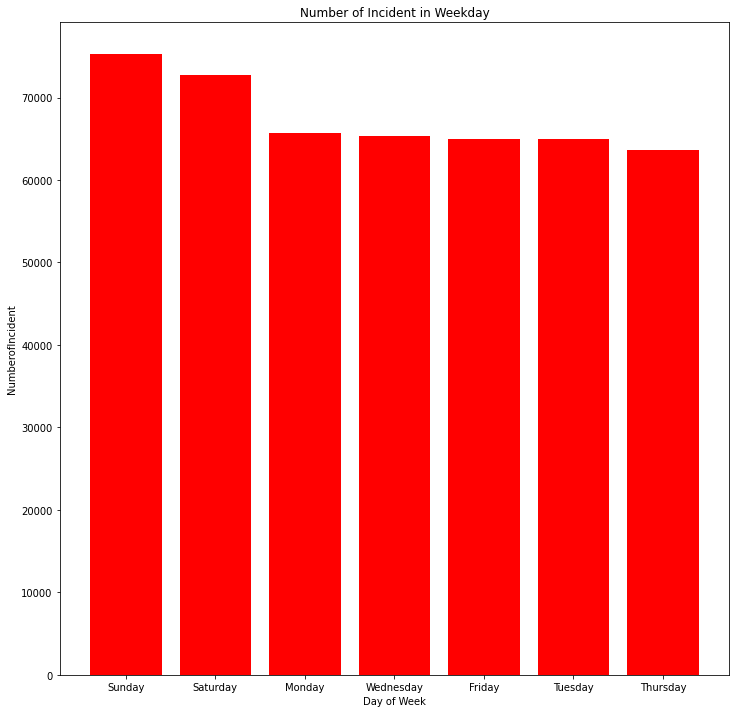

In [18]:
fig = plt.figure(figsize=(12,12))
plt.bar(GunDateofWeek.DateofWeek,GunDateofWeek.NumberofIncident,color="red")
plt.ylabel("NumberofIncident")
plt.xlabel("Day of Week")
plt.title("Number of Incident in Weekday")
plt.show()

*When people have more time to hang around there are more chances to have gun incidents*

# Summary

Total Incidents by States (Top 3): Illinois (35814), California (30745), Texas (30190)

Total Incidents by Cities (Top 3): Chicago (23343), Philadelphia (9879), Texas (7870)

Incidents Per 10000 Inhabitant by States (Top 3): District of Columbia (11.87), Louisiana (4.23), Illinois (3.53)

Incidents Per 10000 Inhabitant by Cities (Top 3): St. Louis(22.14), New Orleans(17.72), Baltimore(16.79)

Incidents by Holiday (Top 3): Labor Day Weekend (2920), New Year’s Day (2061), 4th of July (1955)
